# Info
Name:  

    ACCDAM_2020_Proposal_DARE_drivers
    
Purpose:  

    Make some figures for the DARE ACCDAM proposal, based on SEAC4RS, ORACLES, KORUS-AQ, and ARCTAS 
  
Input:

    None at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - hdf5 python loader
    - 
    - matplotlib
    - numpy
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - '/aod_ict/all_aod_KORUS_R2_ict.mat'
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2020-09-03
    Modified: 

# Prepare python environment

In [76]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
import load_utils as lu
import plotting_utils as pu
from path_utils import getpath
import hdf5storage as hs
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import scipy.stats as st
import scipy.io as sio

In [3]:
import map_utils as mu
import write_utils as wu
from scipy import interpolate
import math

In [4]:
from linfit import linfit
import Sun_utils as su

In [77]:
%matplotlib notebook

In [74]:
fpk = getpath('KORUS')
fpo = getpath('ORACLES')
fps = getpath('SEAC4RS')
fpa = getpath('ARCTAS',path='/data/sam/arctas',make_path=True)

Return path named:  KORUS /data/sam/KORUS-AQ/
Return path named:  ORACLES /data/sam/ORACLES/
Return path named:  SEAC4RS /data/sam/SEAC4RS/
Created new path: /data/sam/arctas/ under the name: ARCTAS
Return path named:  ARCTAS /data/sam/arctas/


# Load the files

## Load the SEAC4RS files

In [12]:
fls = os.listdir(fps+'merge/')
fls.sort()

In [13]:
fls

[u'SEAC4RS-mrg01-dc8_merge_20130806_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130808_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130812_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130814_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130816_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130819_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130821_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130823_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130826_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130827_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130830_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130902_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130904_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130906_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130909_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130911_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130913_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130916_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130918_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130921_R7.ict',
 u'SEAC4RS-mrg01-dc8_merge_20130923_R7.ict']

In [16]:
se,sed = [],[]
for f in fls:
    s,d = lu.load_ict(fps+'merge/'+f,return_header=True)
    se.append(s)
    sed.append(d)

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'GPS_ALT', 'RadarAlt', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'StaticTemp_Experimenter', 'PotentialTemp', 'Dewpoint', 'TotalTemp', 'TotalTemp_Experimenter', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio', 'H2O_VaporPres', 'H2O_SatVaporPresWater', 'H2O_SatVaporPresIce', 'H2O_RelativeHumidity', 'StaticPressure_MMS', 'StaticTemp_MMS', 'TAS_MMS', 'U_MMS', 'V_MMS', 'W_MMS', 'TurbDissipationRate', 'ReynoldsNumber_MMS', 'GPS_LAT_MMS', 'GPS_LON_MMS', 'GPS_ALT_MMS', 'THETA_MMS', 'ROLL_MMS', 'HDG_MMS', 'PITCH_MMS', 'U_AIMMS20', 'V_AIMMS20', 'W_AIMMS20', 'CO2', 'CO_DACOM', 'COSourceFlag_DACOM', 'H2O_DLH', 'CH2O_CAMS', 'CH2O_LIF', 'NO2_ESRL', 'NOy_ESRL', 'NO_ESRL', 'O3_ESRL', 'NO2_TDLIF', 'MPN_TDLIF', '

In [17]:
len(se)

21

In [22]:
se[0]['JDAY']

array([218., 218., 218., ..., 218., 218., 218.])

In [67]:
s = {'AOD380nm_4STAR':[],'AOD452nm_4STAR':[],'AOD501nm_4STAR':[],'AOD865nm_4STAR':[],'LATITUDE':[],'LONGITUDE':[],'UTC':[],'GPS_ALT':[],
     'JDAY':[],'DN500nm_SSFR':[],'UP500nm_SSFR':[],'UP350to2150nm_SSFR':[],'UP350to2150nm_SSFR':[],
     'DNSolarIrrad_BBR':[],'UPSolarIrrad_BBR':[],'Flag_4STAR':[],'ABS660nmTD_PAS_NOAAAeroAbs':[]}
for e in se:
    for k in s.keys():
        s[k] = np.append(s[k],e[k])
        

In [68]:
fl = (s['Flag_4STAR']==0) & (s['GPS_ALT']<1.0)

In [69]:
len(s['AOD501nm_4STAR'])

613189

### Calculate the Angstrom Exponent

In [70]:
# calculate the angstrom exponent
s['AE'] = su.calc_angs(s['UTC'],[380.0,452.0,501.0,865.0],
np.array([s['AOD380nm_4STAR'],s['AOD452nm_4STAR'],s['AOD501nm_4STAR'],s['AOD865nm_4STAR']]))

A Jupyter Widget

In [50]:
np.nanmin(s['AE'][fl]),np.nanmax(s['AE'][fl])

(-inf, inf)

### Plot out the SEAC4RS ratios

<IPython.core.display.Javascript object>


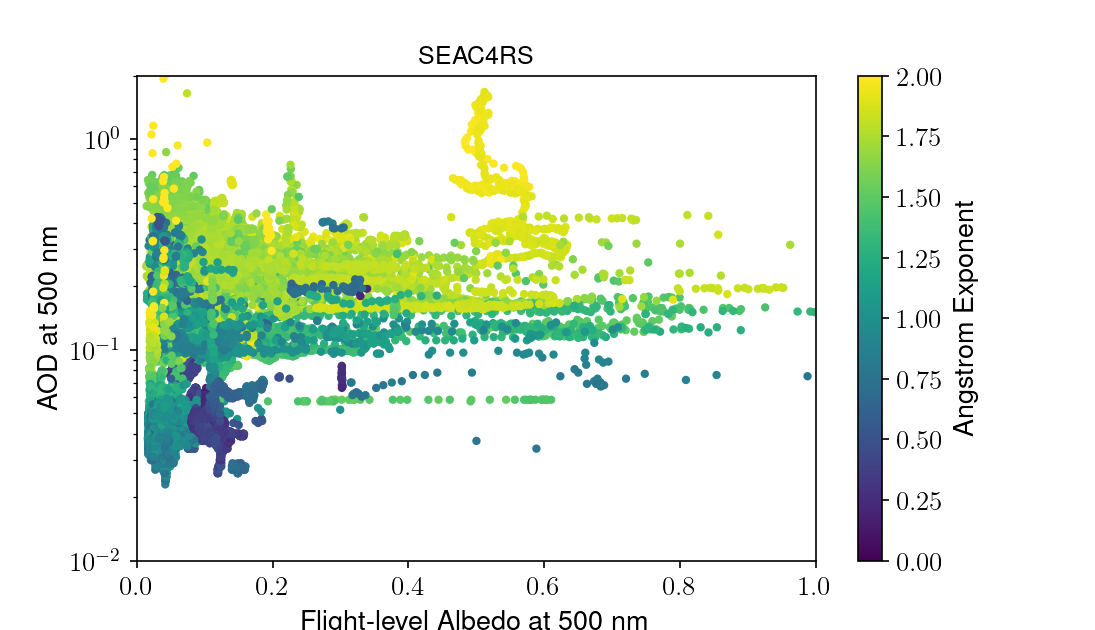

<IPython.core.display.Javascript object>


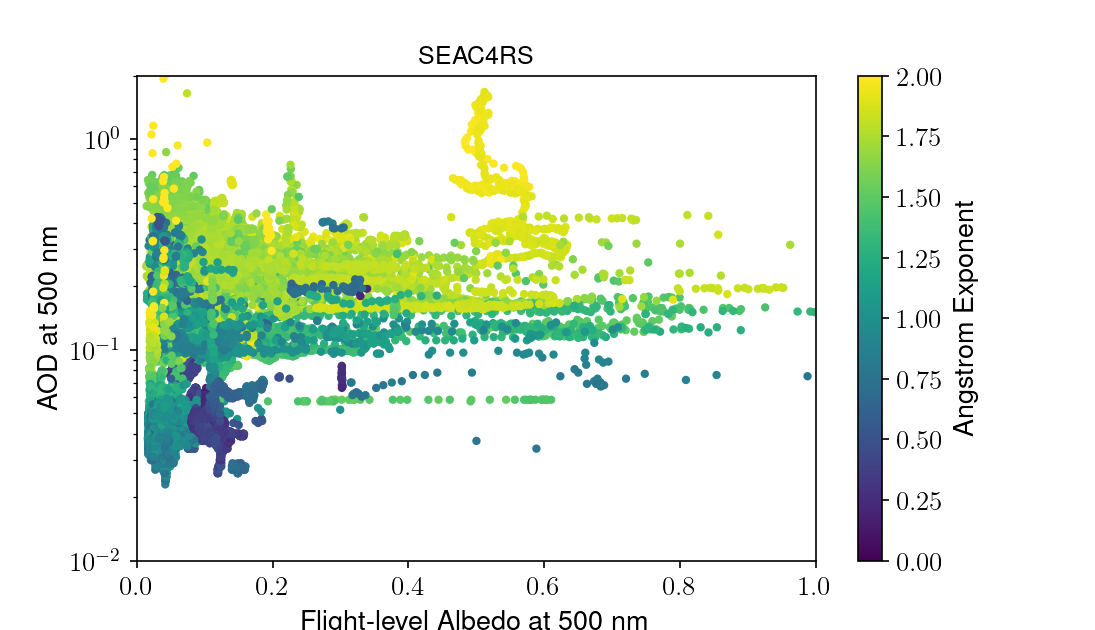

(0, 1)

(0.01, 2.0)

Text(0,0.5,'AOD at 500 nm')

Text(0.5,0,'Flight-level Albedo at 500 nm')

Text(0.5,1,'SEAC4RS')

In [66]:
plt.figure()
plt.scatter(s['UP500nm_SSFR'][fl]/s['DN500nm_SSFR'][fl],s['AOD501nm_4STAR'][fl],c=s['AE'][fl],marker='.',vmin=0,vmax=2.0)
plt.xlim([0,1])
plt.yscale('log')
plt.ylim(0.01,2.0)
plt.ylabel('AOD at 500 nm')
plt.xlabel('Flight-level Albedo at 500 nm')
plt.colorbar(label='Angstrom Exponent')
plt.title('SEAC4RS')

plt.savefig(fps+'plots/SEAC4RS_AOD_vs_Alebdo_AE.png',transparent=True,dpi=600)

In [60]:
s['GPS_ALT'].min()

-0.0296

<IPython.core.display.Javascript object>


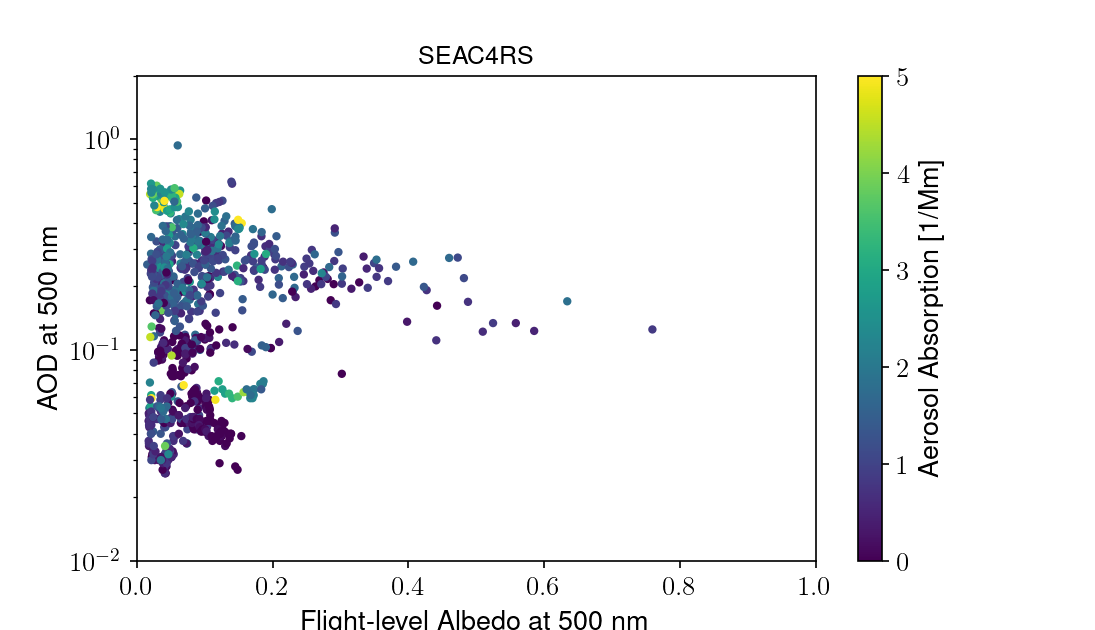

<IPython.core.display.Javascript object>


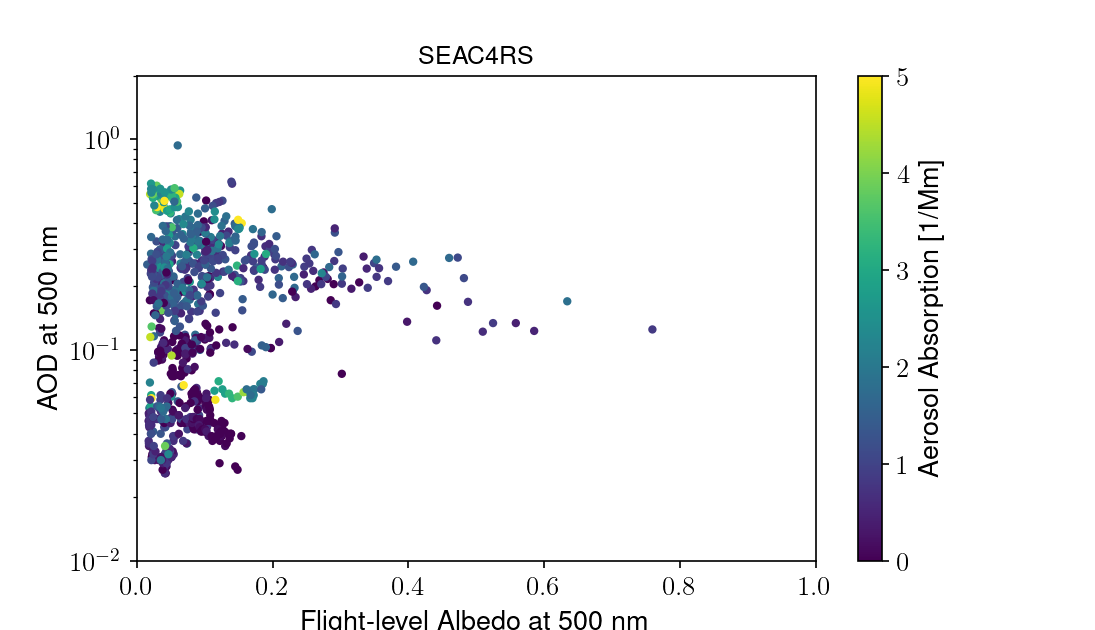

(0, 1)

(0.01, 2.0)

Text(0,0.5,'AOD at 500 nm')

Text(0.5,0,'Flight-level Albedo at 500 nm')

Text(0.5,1,'SEAC4RS')

In [72]:
plt.figure()
plt.scatter(s['UP500nm_SSFR'][fl]/s['DN500nm_SSFR'][fl],s['AOD501nm_4STAR'][fl],c=s['ABS660nmTD_PAS_NOAAAeroAbs'][fl],marker='.',vmin=0,vmax=5.0)
plt.xlim([0,1])
plt.yscale('log')
plt.ylim(0.01,2.0)
plt.ylabel('AOD at 500 nm')
plt.xlabel('Flight-level Albedo at 500 nm')
plt.colorbar(label='Aerosol Absorption [1/Mm]')
plt.title('SEAC4RS')

plt.savefig(fps+'plots/SEAC4RS_AOD_vs_Alebdo_abs.png',transparent=True,dpi=600)

## Load the ARCTAS retrievals

In [79]:
a = sio.idl.readsav(fpa+'nasa/20080709/seven/20080709_forcing_abs.out')

In [80]:
a.keys()

['effp',
 'wvl_arr',
 'no_rad_dn',
 'no_rad_up',
 'asy2',
 'albedo',
 'aot',
 'rad_up',
 'rad_dn',
 'forcing',
 'ssa',
 'asy',
 'eff']

In [82]:
a['wvl_arr']

array([ 353.5,  380. ,  451.2,  499.4,  520.4,  605.8,  675.1,  779.1,
        864.5, 1019.1, 1241.3, 1558.5, 2139.1], dtype=float32)

In [83]:
a['asy'].shape

(173, 13)

In [84]:
a['forcing'].shape

(2, 165, 13)

In [86]:
for k in a.keys():
    print k, a[k].shape

effp (2, 165, 13)
wvl_arr (13,)
no_rad_dn (2, 165, 13)
no_rad_up (2, 165, 13)
asy2 (173, 13)
albedo (173, 13)
aot (165, 13)
rad_up (2, 165, 13)
rad_dn (2, 165, 13)
forcing (2, 165, 13)
ssa (173, 13)
asy (173, 13)
eff (2, 165, 13)


In [85]:
a['eff'].shape

(2, 165, 13)

In [97]:
a['forcing'][1,:,:]

array([[-0.02822661, -0.04675883, -0.12463701, ...,         nan,
        -0.00241679, -0.00067476],
       [-0.02280658, -0.04006207, -0.08492792, ...,         nan,
                nan,         nan],
       [-0.02889419, -0.04420549, -0.09167421, ...,         nan,
         0.00606684,         nan],
       ...,
       [-0.02205032, -0.04374665, -0.12495255, ..., -0.00185218,
        -0.00223644,         nan],
       [-0.02597529, -0.04870039, -0.14876425, ..., -0.01163465,
                nan,         nan],
       [-0.02256346, -0.04898912, -0.14857602, ...,         nan,
        -0.00234075,         nan]], dtype=float32)

In [110]:
forc = np.zeros((165,13))+np.nan
for q in xrange(165):
    if any(np.isfinite(a['forcing'][1,q,:])):
        forc[q,:] = Sp.smooth(a['forcing'][1,q,:],1,nan=True,old=True)

In [112]:
dare = np.trapz(forc,a['wvl_arr'])

### Plot the DARE

<IPython.core.display.Javascript object>


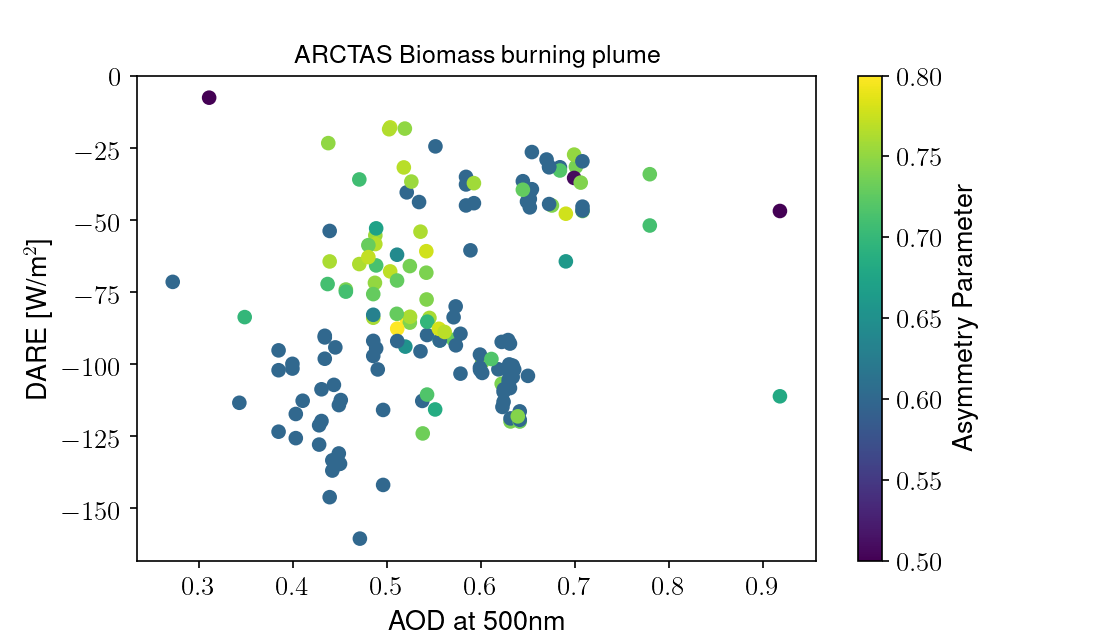

<IPython.core.display.Javascript object>


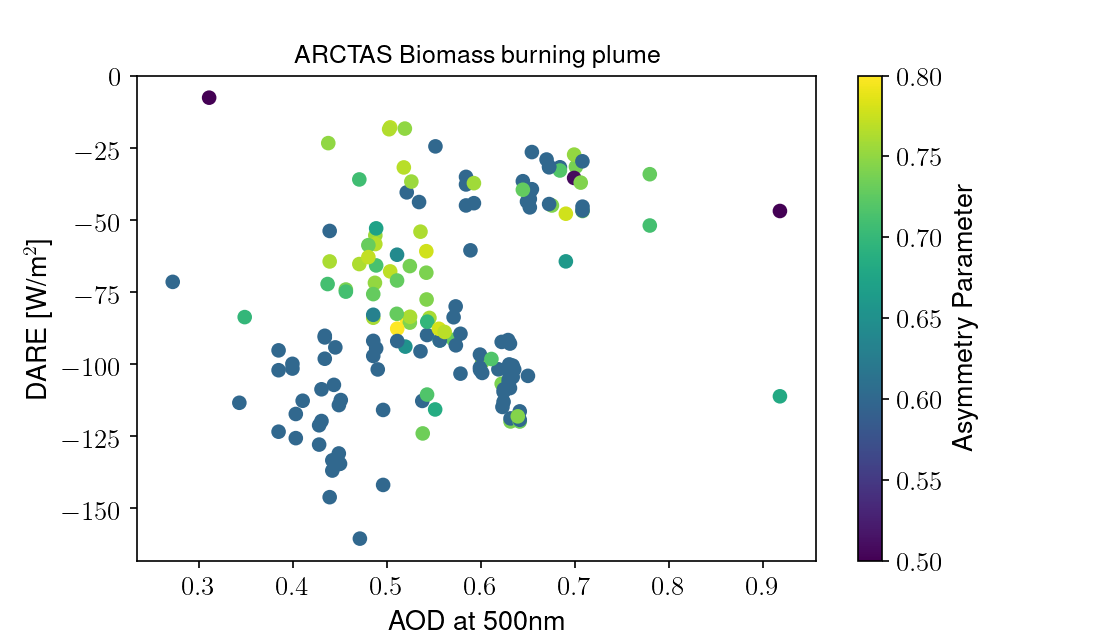

Text(0.5,0,'AOD at 500nm')

Text(0,0.5,'DARE [W/m$^2$]')

Text(0.5,1,'ARCTAS Biomass burning plume')

In [120]:
plt.figure()
plt.scatter(a['aot'][:,3],dare,c=a['asy'][0:165,3],vmin=0.5,vmax=0.8)
plt.xlabel('AOD at 500nm')
plt.ylabel('DARE [W/m$^2$]')
plt.title('ARCTAS Biomass burning plume')
plt.colorbar(label='Asymmetry Parameter')
plt.savefig(fpa+'plots/ARCTAS_DARE_vs_AOD_asy.png',transparent=True,dpi=600)

## Load ARCTAS results and compare to RH

In [121]:
rh,rhdict = lu.load_ict(fpa+'nasa/pds_p3b_20080709_r2.ict',return_header=True)

Seperation is set to a space
('Time', 'FMS_ALT_PRES', 'FMS_TAS', 'FMS_SAT', 'FMS_LAT', 'FMS_LON', 'FMS_GRD_SPD', 'FMS_HDG', 'FMS_TRK', 'FMS_WNS', 'FMS_WND', 'IRS_PITCH', 'IRS_ROLL', 'ADC_MACH', 'ADC_IAS', 'GPS_ALT', 'A_DP1011', 'A_TotalTempDegC', 'A_CabinPressure', 'A_SurfTemp', 'C_StaticPressure', 'C_DiffPressure', 'C_TotalTempDegK', 'C_StatTempDegK', 'C_StatTempDegC', 'C_PotTempDegK', 'C_CabAltitude', 'C_VaporPres', 'C_SatVaporPresWater', 'C_SatVaporPresIce', 'C_RelHumidityWater', 'C_RelHumidityIce', 'C_MixingRatio', 'C_CorrectRadarAlt')


In [122]:
rh['C_RelHumidityWater']

array([60.04, 59.4 , 60.19, ..., 48.38, 48.14, 47.42])

In [146]:
rh_utc = rh['Time']/3600.0

In [151]:
il10 = np.argmin(abs(rh_utc-19.613))
il11 = np.argmin(abs(rh_utc-19.686))

il20 = np.argmin(abs(rh_utc-19.245))
il21 = np.argmin(abs(rh_utc-19.343))

In [152]:
rh['FMS_LAT'][il10],rh['FMS_LAT'][il11],rh['FMS_LAT'][il20],rh['FMS_LAT'][il21]

(60.7948, 61.0637, 61.109, 60.6676)

In [159]:
fl1 = Sp.find_closest(rh['FMS_LAT'][il10:il11],rtma[:,0])
fl2 = Sp.find_closest(rh['FMS_LAT'][il20:il21],rtma[:,0])

In [160]:
rh_rt = rh['C_RelHumidityWater'][il10:il11][fl1]
rh_rt2 = rh['C_RelHumidityWater'][il20:il21][fl2]

In [163]:
rh_rt

array([38.06, 39.17, 38.66, 38.74, 39.14, 38.8 , 39.04, 39.62, 39.52,
       39.28, 38.92, 39.24, 37.92, 38.72, 38.91, 38.03, 38.51, 38.21,
       38.17, 37.92, 37.41, 37.75, 37.53, 38.03, 39.29, 39.41, 38.74,
       39.19, 38.37, 37.72, 38.76, 38.17, 38.07, 37.21, 37.22, 37.96,
       37.36, 37.82, 38.32, 37.33, 38.47, 38.8 , 37.2 , 37.92, 39.08,
       39.04, 38.31, 39.51, 40.03, 39.44, 39.22, 39.05, 39.4 , 38.98,
       39.1 , 39.39, 38.65, 39.35, 39.72, 39.78, 39.59, 38.96, 39.13,
       38.58, 40.31, 38.82, 38.58, 38.86, 39.84, 39.49, 38.51, 38.93,
       37.77, 36.67, 37.09, 36.85, 37.97, 35.38, 36.4 , 35.89, 36.26,
       36.59, 37.08, 37.15, 36.36, 35.87, 36.82, 35.05, 36.2 , 37.11,
       36.59, 36.23, 36.93, 36.05, 36.4 , 36.36, 37.35, 37.58, 36.58,
       36.56, 37.4 , 37.66, 37.07, 37.53, 37.73, 36.29, 37.69, 37.2 ,
       36.12, 37.19, 37.2 , 37.52, 37.8 , 37.93, 37.22, 36.69, 36.98,
       37.18, 38.04, 38.1 , 37.7 , 37.35, 37.41, 36.85, 36.71, 36.35,
       36.92, 36.77,

In [136]:
rtma = np.genfromtxt(fpa+'nasa/20080709/seven/rtm_hsrl_20080709_wvl0499.txt',skip_header=1)

In [140]:
#lat     lon   ssa   asy   asy2    albedo     correction    tau modification    flux divergence   model down      model up       tau    Ft_up   Ft_dn    Fb_up   Fb_dn

In [137]:
rtma

array([[ 6.08488797e+01, -1.05794702e+02,  7.79164000e-01, ...,
         1.46056800e+00,  3.82130000e-02,  1.12554250e+00],
       [ 6.08561826e+01, -1.05800807e+02,             nan, ...,
         1.45743680e+00,  4.71404000e-02,  1.11922160e+00],
       [ 6.08593609e+01, -1.05803401e+02,  9.14573800e-01, ...,
         1.46881340e+00,  5.44433000e-02,  1.31580700e+00],
       ...,
       [ 6.10534821e+01, -1.06005659e+02,  9.03215100e-01, ...,
         1.48905050e+00,  4.47577000e-02,  1.12398490e+00],
       [ 6.10544806e+01, -1.06006840e+02,  8.79932000e-01, ...,
         1.48905050e+00,  4.65365000e-02,  1.07791880e+00],
       [ 6.10554775e+01, -1.06008036e+02,  8.61698800e-01, ...,
         1.48905050e+00,  4.28374000e-02,  1.05228530e+00]])

In [138]:
rtma.shape

(161, 16)

In [178]:
rtma[:,11]

array([0.4453253,       nan, 0.2425944,       nan, 0.2358598,       nan,
             nan, 0.2744392, 0.2872644, 0.2872644, 0.287678 , 0.3126935,
       0.3005397, 0.2882718, 0.3008054, 0.313339 , 0.3128308, 0.325344 ,
       0.3126334, 0.3126334, 0.3128117, 0.3252738, 0.3377843, 0.3375688,
       0.3375688, 0.3500713, 0.363153 , 0.363304 , 0.3883595, 0.3870052,
       0.3620372, 0.3492976, 0.3368227,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
       0.805818 , 0.8057467, 0.8057467, 0.8055848, 0.8066124,       nan,
             nan,       nan,       nan,       nan, 0.7806014, 0.7818779,
       0.7821689, 0.7508821, 0.7524962, 0.7838501, 0.7838501, 0.7827649,
       0.7857647, 0.7857647, 0.786325 , 0.786325 , 0.78463  , 0.78463  ,
       0.78463  , 0.7861558, 0.78662  , 0.78662  , 0.78662  , 0.7874054,
       0.7874054, 0.7863239, 0.7863239, 0.7856968, 

<IPython.core.display.Javascript object>


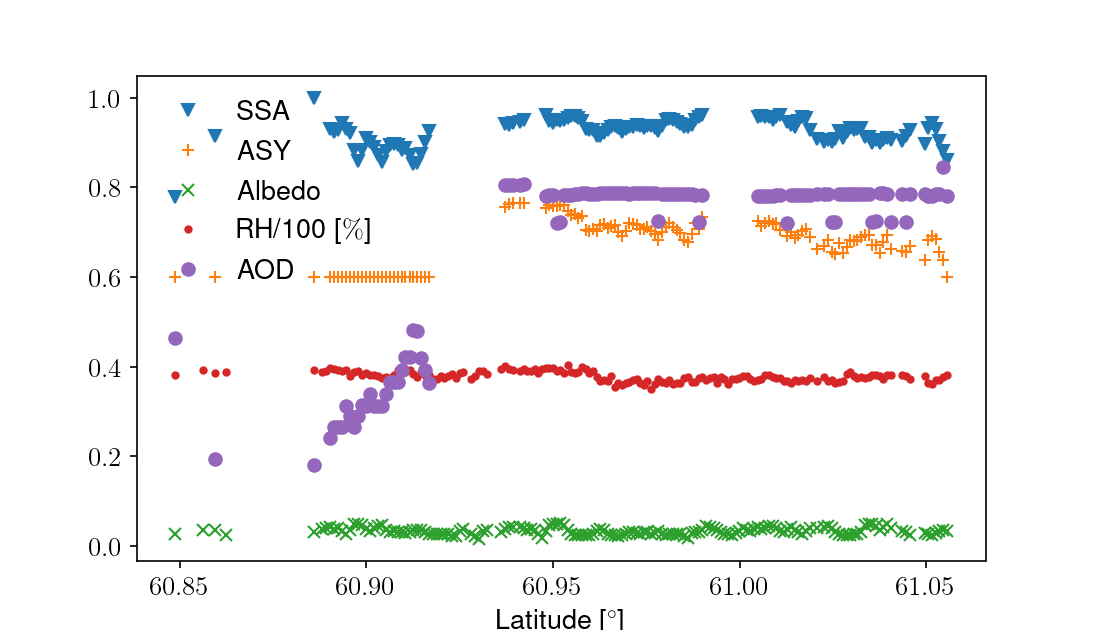

<IPython.core.display.Javascript object>


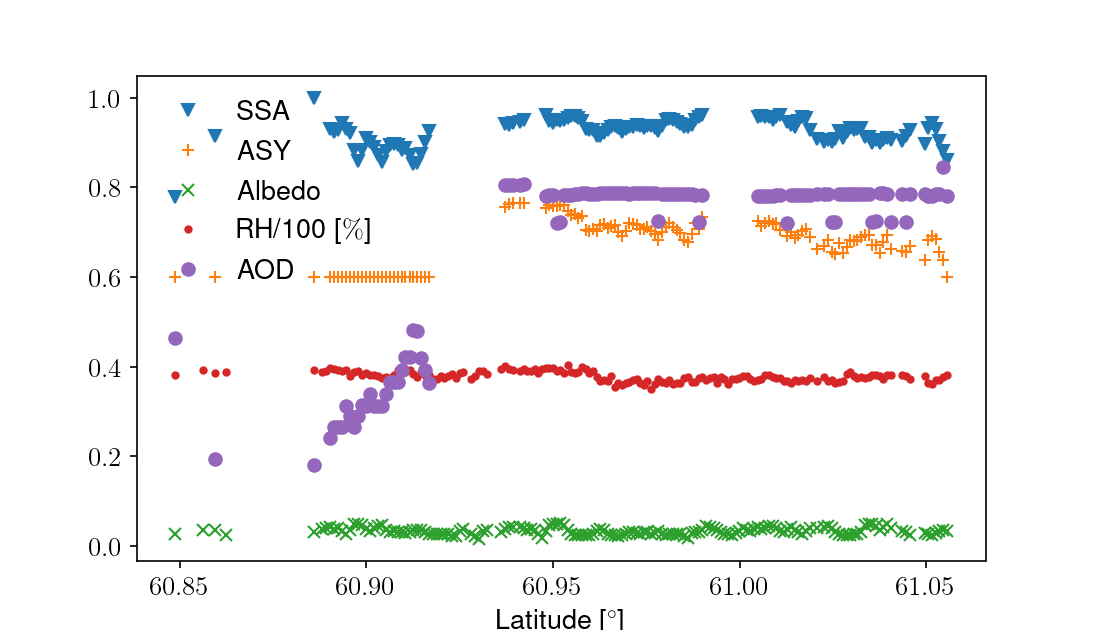

Text(0.5,0,'Latitude [$^{{\\circ}}$]')

In [177]:
plt.figure()
plt.plot(rtma[:,0],rtma[:,2],'v',label='SSA')
plt.plot(rtma[:,0],rtma[:,3],'+',label='ASY')
plt.plot(rtma[:,0],rtma[:,5],'x',label='Albedo')

plt.plot(rtma[:,0],rh_rt/100.0,'.',label='RH/100 [$\%$]')
plt.plot(rtma[:,0],rtma[:,11]*rtma[:,7],'o',label='AOD')


plt.legend(frameon=False)
plt.xlabel('Latitude [$^{{\\circ}}$]')
#plt.xlim(60.9267,61.06)

### Load from digitized plots

In [179]:
eFR_sur = np.array([[60.89086, -19.70582],
[60.89557, -21.68807],
[60.89807, -23.73104],
[60.90017, -22.86450],
[60.90222, -25.25048],
[60.90583, -25.61747],
[60.90887, -24.82233],
[60.91159, -27.02213],
[60.91358, -29.43621],
[60.91358, -31.71722],
[60.91571, -24.87841],
[60.91780, -24.18429],
[60.92007, -28.04244],
[60.91954, -31.13430],
[60.91968, -32.41279],
[60.92217, -25.16222],
[60.92522, -25.66982],
[60.92841, -23.66392],
[60.93045, -25.78450],
[60.93381, -25.43481],
[60.93714, -26.75110],
[60.94066, -26.31281],
[60.94351, -23.40437],
[60.94933, -23.68676],
[60.95266, -23.76326],
[60.95618, -23.80096],
[60.95810, -24.80771],
[60.95986, -27.24801],
[60.96318, -27.15017],
[60.96651, -26.50992],
[60.96964, -26.43704],
[60.97316, -26.06240],
[60.97649, -26.41010],
[60.97920, -27.23452],
[60.98092, -24.66534],
[60.98408, -26.76816],
[60.98547, -28.29201],
[60.98757, -24.98299],
[60.99006, -22.79133],
[61.00336, -23.16706],
[61.00471, -25.94510],
[61.00803, -25.81128],
[61.01144, -26.10915],
[61.01445, -27.57565],
[61.01744, -26.38632],
[61.01896, -29.72664],
[61.02276, -30.49346],
[61.02581, -30.40538],
[61.02926, -28.71374],
[61.03226, -26.85016],
[61.03578, -27.30296],
[61.03911, -26.83706],
[61.04243, -27.70779],
[61.04548, -27.21485],
[61.04881, -30.02081],
[61.05189, -25.65805],
[61.05047, -28.53838],
[61.05463, -27.08428]])

In [184]:
eFR_toa = np.array([[60.89086, -11.73246],
[60.89507, -12.66105],
[60.89724, -10.08398],
[60.90056, -11.82644],
[60.90402, -11.34209],
[60.90693, -11.96015],
[60.91164, -11.31949],
[60.91469, -12.56224],
[60.91940, -13.78845],
[60.92267, -15.32614],
[60.92384, -16.95301],
[60.92605, -13.22525],
[60.92966, -15.41041],
[60.93160, -13.75439],
[60.93603, -13.42376],
[60.93880, -12.15409],
[60.94268, -13.69298],
[60.94573, -13.84705],
[60.94905, -12.43872],
[60.95252, -12.26625],
[60.95653, -13.71470],
[60.95986, -12.15753],
[60.96318, -11.51728],
[60.96623, -12.63993],
[60.96928, -12.34845],
[60.97427, -12.75377],
[60.97870, -13.68229],
[60.98175, -13.91385],
[60.98535, -14.41644],
[60.98873, -13.95826],
[60.99062, -13.67875],
[61.00475, -15.47612],
[61.00807, -14.51624],
[61.01157, -15.95529],
[61.01417, -14.34008],
[61.01744, -14.43791],
[61.02077, -12.04259],
[61.02387, -12.08816],
[61.02697, -13.99340],
[61.03024, -13.47327],
[61.03274, -10.95422],
[61.03673, -10.36414],
[61.03994, -10.17722],
[61.04327, -11.40827],
[61.04798, -12.82875],
[61.05102, -13.35088],
[61.05352, -9.88262],
[61.05490, -14.93820]])

In [181]:
eFR_sur.shape

(58, 2)

In [189]:
aod = np.array([[60.89008, 0.40310],
[60.89073, 0.43132],
[60.89260, 0.45282],
[60.89624, 0.45517],
[60.89955, 0.46196],
[60.90128, 0.46810],
[60.90302, 0.46236],
[60.90614, 0.46643],
[60.90884, 0.49038],
[60.91165, 0.51336],
[60.91405, 0.47566],
[60.91773, 0.47631],
[60.91949, 0.49515],
[60.92100, 0.46528],
[60.92117, 0.43938],
[60.92313, 0.41292],
[60.92439, 0.46055],
[60.92397, 0.43737],
[60.92565, 0.49246],
[60.92813, 0.50921],
[60.93013, 0.48339],
[60.93265, 0.51631],
[60.93601, 0.53933],
[60.93938, 0.54168],
[60.94294, 0.52519],
[60.94470, 0.50993],
[60.94878, 0.55701],
[60.95226, 0.56184],
[60.95478, 0.57813],
[60.95646, 0.59963],
[60.95862, 0.65132],
[60.95702, 0.62281],
[60.96166, 0.65578],
[60.96514, 0.65506],
[60.96863, 0.65722],
[60.97187, 0.64398],
[60.97523, 0.65238],
[60.97775, 0.64532],
[60.97921, 0.62019],
[60.97876, 0.58915],
[60.98271, 0.62771],
[60.98580, 0.62050],
[60.98643, 0.64398],
[60.98839, 0.59929],
[60.98951, 0.56805],
[61.00324, 0.55377],
[61.00499, 0.53261],
[61.00792, 0.55960],
[61.00828, 0.54319],
[61.01136, 0.57000],
[61.01336, 0.60399],
[61.01528, 0.58189],
[61.01818, 0.60618],
[61.01948, 0.64095],
[61.02014, 0.66346],
[61.02242, 0.68391],
[61.02529, 0.65434],
[61.02807, 0.66296],
[61.03013, 0.64666],
[61.03041, 0.62684],
[61.03153, 0.68530],
[61.03366, 0.70203],
[61.03629, 0.73401],
[61.03965, 0.73032],
[61.04301, 0.72830],
[61.04609, 0.70566],
[61.04889, 0.68278],
[61.05001, 0.65305],
[61.04983, 0.62483],
[61.05226, 0.74889],
[61.05151, 0.72091],
[61.05113, 0.68127],
[61.05282, 0.77122],
[61.05338, 0.79415]])

In [190]:
asy = np.array([[60.89036, 0.72145],
[60.89176, 0.74478],
[60.89512, 0.70978],
[60.89736, 0.73322],
[60.90055, 0.70606],
[60.90334, 0.70021],
[60.90636, 0.68252],
[60.90969, 0.68844],
[60.91277, 0.67508],
[60.91407, 0.65501],
[60.91697, 0.67687],
[60.92089, 0.65774],
[60.92061, 0.62371],
[60.92355, 0.61197],
[60.92565, 0.65736],
[60.92845, 0.66342],
[60.92985, 0.63188],
[60.93450, 0.64575],
[60.93713, 0.64758],
[60.94106, 0.64639],
[60.94386, 0.66720],
[60.94862, 0.65988],
[60.95198, 0.66752],
[60.95506, 0.65080],
[60.95822, 0.66017],
[60.96178, 0.65879],
[60.96514, 0.65711],
[60.96851, 0.64786],
[60.97187, 0.65227],
[60.97523, 0.64786],
[60.97871, 0.62701],
[60.97859, 0.60160],
[60.98195, 0.64134],
[60.98527, 0.61836],
[60.98503, 0.60034],
[60.98867, 0.64113],
[60.99063, 0.65585],
[61.00352, 0.61866],
[61.00604, 0.60728],
[61.00940, 0.60328],
[61.01283, 0.60949],
[61.01632, 0.60809],
[61.01948, 0.60665],
[61.02284, 0.62347],
[61.02525, 0.60135],
[61.02845, 0.61085],
[61.03083, 0.62620],
[61.03349, 0.66131],
[61.03685, 0.65879],
[61.04021, 0.66110],
[61.04357, 0.64723],
[61.04637, 0.63030],
[61.04945, 0.61043],
[61.05247, 0.66152],
[61.05450, 0.67098]])

In [191]:
ssa = np.array([[60.89120, 0.94978],
[60.89540, 0.94045],
[60.89848, 0.92035],
[60.90156, 0.92203],
[60.90464, 0.91067],
[60.90800, 0.92224],
[60.91109, 0.90866],
[60.91361, 0.88954],
[60.91635, 0.93162],
[60.91799, 0.93086],
[60.92005, 0.90992],
[60.92313, 0.93990],
[60.92621, 0.92935],
[60.92929, 0.94537],
[60.93265, 0.93065],
[60.93601, 0.92140],
[60.93938, 0.91530],
[60.94218, 0.93086],
[60.94386, 0.94978],
[60.94890, 0.93086],
[60.95226, 0.93128],
[60.95562, 0.94200],
[60.95898, 0.91698],
[60.96234, 0.90100],
[60.96570, 0.91698],
[60.96907, 0.91467],
[60.97243, 0.92014],
[60.97579, 0.92056],
[60.97915, 0.92497],
[60.98251, 0.93128],
[60.98587, 0.92119],
[60.98895, 0.94272],
[61.00492, 0.93927],
[61.00828, 0.93654],
[61.01164, 0.93675],
[61.01500, 0.92771],
[61.01724, 0.93275],
[61.01892, 0.90079],
[61.02228, 0.88923],
[61.02565, 0.89575],
[61.02901, 0.91152],
[61.03181, 0.91604],
[61.04133, 0.89806],
[61.04665, 0.90134],
[61.04903, 0.89112],
[61.05141, 0.91541],
[61.05394, 0.89175]])

<IPython.core.display.Javascript object>


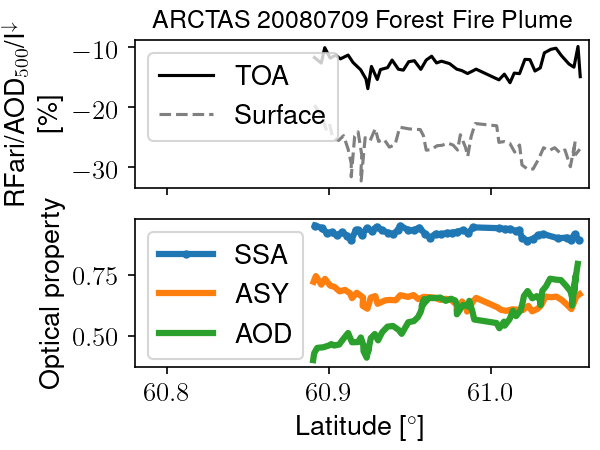

Text(0,0.5,'RFari/AOD$_{{500}}$/I$^\\downarrow$ \n[\\%]')

Text(0.5,1,'ARCTAS 20080709 Forest Fire Plume')

Text(0.5,0,'Latitude [$^\\circ$]')

Text(0,0.5,'Optical property')

(60.78, 61.06)

In [228]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(4,3))
ax[0].plot(eFR_toa[:,0],eFR_toa[:,1],'-',color='k',label=('TOA'))
ax[0].plot(eFR_sur[:,0],eFR_sur[:,1],'--',color='grey',label=('Surface'))
ax[0].legend(frameon=True,loc=2)
ax[0].set_ylabel('RFari/AOD$_{{500}}$/I$^\downarrow$ \n[\%]')
ax[0].set_title('ARCTAS 20080709 Forest Fire Plume')
ax[1].plot(ssa[:,0],ssa[:,1],'-',marker='.',lw=3,label='SSA')
ax[1].plot(asy[:,0],asy[:,1],'-',lw=3,label='ASY')
ax[1].plot(aod[:,0],aod[:,1],'-',lw=3,label='AOD')
ax[1].legend(frameon=True,loc=2)
ax[1].set_xlabel('Latitude [$^\\circ$]')
ax[1].set_ylabel('Optical property')
plt.tight_layout(h_pad=0.02,pad=0.3)
plt.xlim(60.78,61.06)
plt.savefig(fpa+'ARCTAS_RFari_20080709_results.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


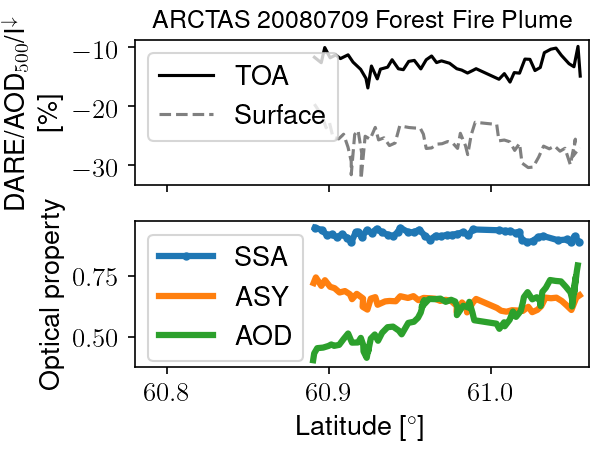

Text(0,0.5,'DARE/AOD$_{{500}}$/I$^\\downarrow$ \n[\\%]')

Text(0.5,1,'ARCTAS 20080709 Forest Fire Plume')

Text(0.5,0,'Latitude [$^\\circ$]')

Text(0,0.5,'Optical property')

(60.78, 61.06)

In [229]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(4,3))
ax[0].plot(eFR_toa[:,0],eFR_toa[:,1],'-',color='k',label=('TOA'))
ax[0].plot(eFR_sur[:,0],eFR_sur[:,1],'--',color='grey',label=('Surface'))
ax[0].legend(frameon=True,loc=2)
ax[0].set_ylabel('DARE/AOD$_{{500}}$/I$^\downarrow$ \n[\%]')
ax[0].set_title('ARCTAS 20080709 Forest Fire Plume')
ax[1].plot(ssa[:,0],ssa[:,1],'-',marker='.',lw=3,label='SSA')
ax[1].plot(asy[:,0],asy[:,1],'-',lw=3,label='ASY')
ax[1].plot(aod[:,0],aod[:,1],'-',lw=3,label='AOD')
ax[1].legend(frameon=True,loc=2)
ax[1].set_xlabel('Latitude [$^\\circ$]')
ax[1].set_ylabel('Optical property')
plt.tight_layout(h_pad=0.02,pad=0.3)
plt.xlim(60.78,61.06)
plt.savefig(fpa+'ARCTAS_DARE_20080709_results.png',dpi=600,transparent=True)